In [1]:
from inversion_edits import ddim_inversion_latent, ddim_first_skipped_latent

from diffusers import DDIMScheduler, StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
#model_id = "./cat_finetuned"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, local_files_only = True).to(
    "cuda:0"
)


/home/simo/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/simo/anaconda3/envs/torch/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [3]:
import PIL
x = PIL.Image.open("horse.jpg")
lat = ddim_first_skipped_latent(pipe, x, condition_prompt="", num_inference_steps= 50, skip_ratio=0.5)

Scheduler for Pipe is now DDIMScheduler


51it [00:01, 29.02it/s]


100%|██████████| 50/50 [00:02<00:00, 16.83it/s]


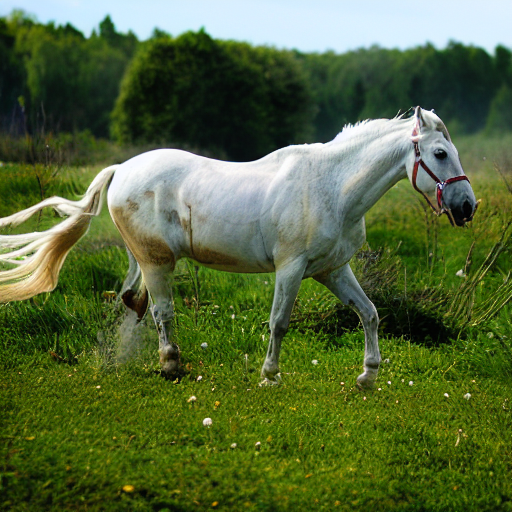

In [4]:
pipe.safety_checker = None
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

Scheduler for Pipe is now DDIMScheduler


100%|██████████| 50/50 [00:02<00:00, 17.00it/s]


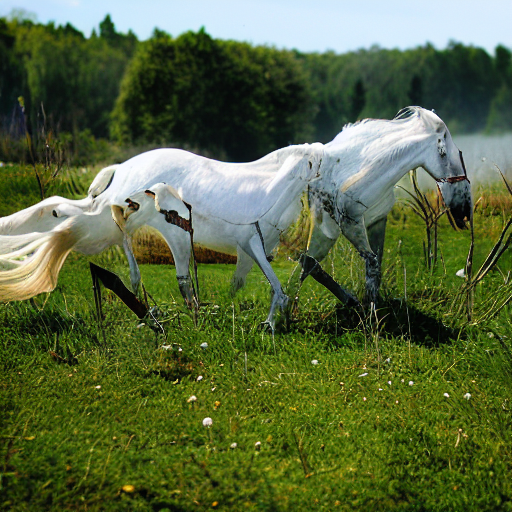

In [5]:
lat = ddim_inversion_latent(pipe, x, condition_prompt="", num_inference_steps= 50)
x_unskipped_reco = pipe(prompt = "", latents = lat)
x_unskipped_reco.images[0]

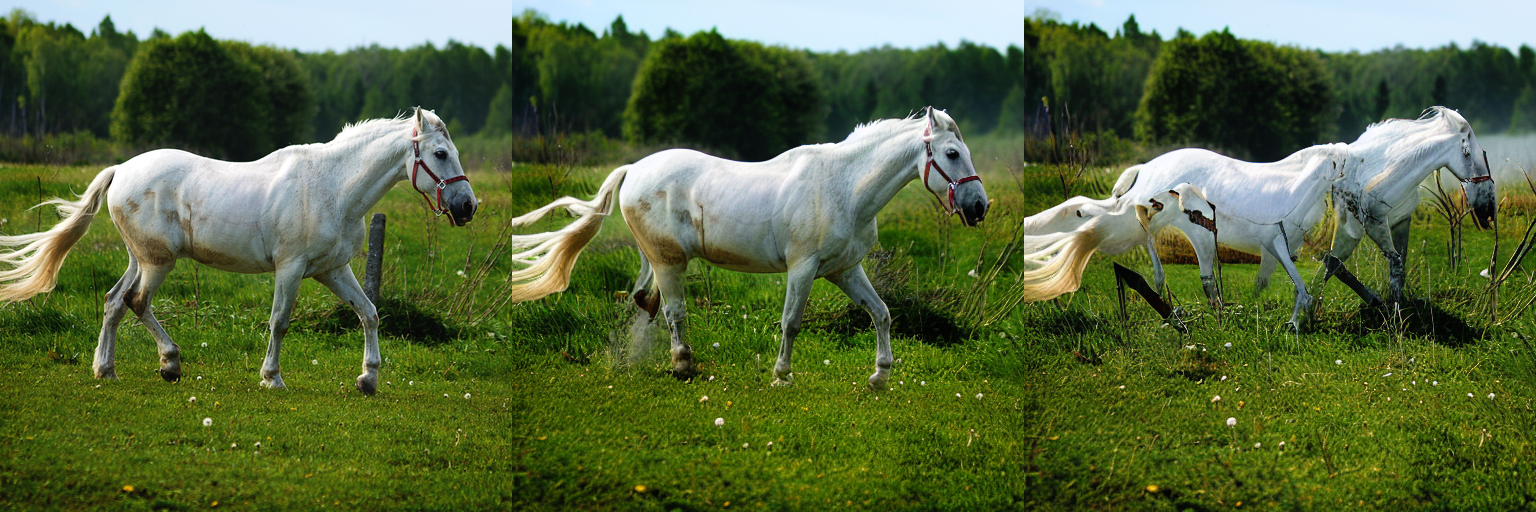

In [7]:
from lora_diffusion import image_grid
image_grid([x, x_reco.images[0], x_unskipped_reco.images[0]], 1, 3)

In [ ]:
pipe.safety_checker = None
x2 = pipe(prompt = "horse with blue boots", latents = lat, num_inference_steps=100, guidance_scale= 7.)

100%|██████████| 100/100 [00:07<00:00, 14.25it/s]


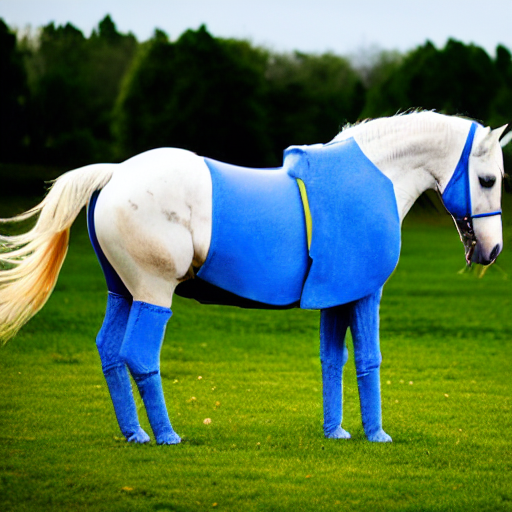

In [ ]:
x2.images[0]

100%|██████████| 50/50 [00:02<00:00, 16.96it/s]


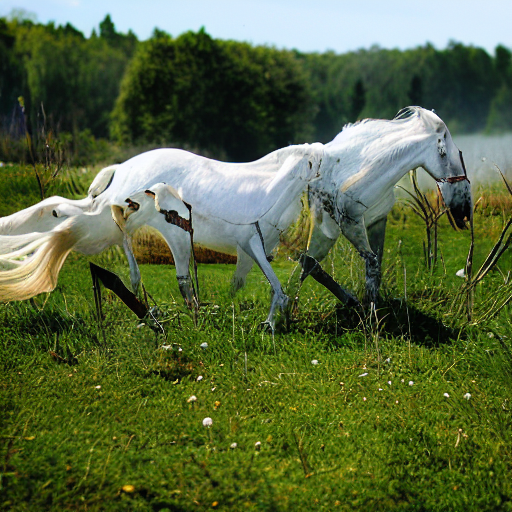

In [ ]:
pipe.safety_checker = None
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

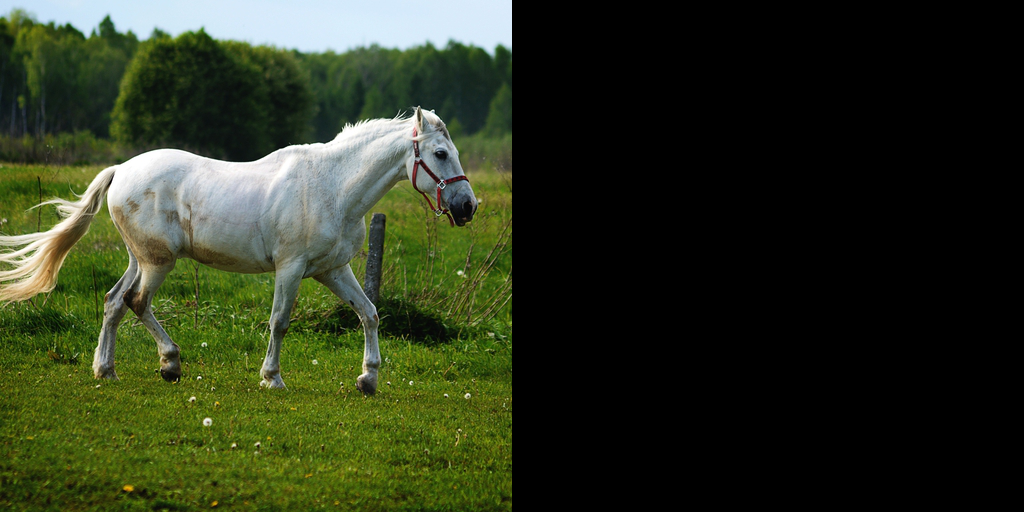

In [ ]:
from PIL import Image
from lora_diffusion import image_grid